In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import corner, sys
import getdist, emcee
from getdist import plots, MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_to_plot_fiducial = ['chains_count_only.h5', 
                         'chains_mass_only.h5', 
                         'chains_count_mass.h5']
file_to_plot_flagship = ['chains_count_only_flagship.h5', 
                         'chains_mass_only_flagship.h5', 
                         'chains_count_mass_flagship.h5']
names = ['1', '2', '3', '4', '5']
labels = [r'\Omega_m', r'\sigma_8', r'\alpha', r'\beta', r'\sigma']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':4, 'smooth_scale_1D':4, 'boundary_correction_order':0}

def createMC(file):
    MC_list = []
    for f in file:
        n_cut=25000
        backend = emcee.backends.HDFBackend(f)
        chain = backend.get_chain(discard=0, thin=1, flat=True)    
        MC_list.append(MCSamples(samples=chain[n_cut:],
                                 names = names, 
                            labels = labels, 
                             settings=settings, 
                             label=f))
    return MC_list

In [3]:
MC_fiducial = createMC(file_to_plot_fiducial)

Removed no burn in
Removed no burn in
Removed no burn in


In [4]:
MC_flagship = createMC(file_to_plot_flagship)

Removed no burn in
Removed no burn in
Removed no burn in


In [5]:
params_fid=[0.3, 0.8, -9.348, 0.75, 0.3]

In [6]:
markers={f'{i+1}':params_fid[i] for i in range(len(params_fid))}

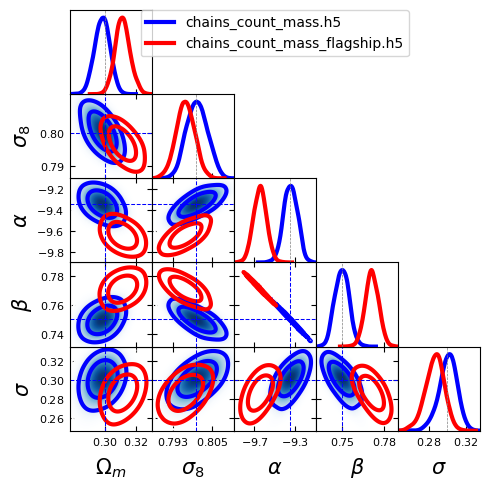

In [9]:
g = plots.get_subplot_plotter(subplot_size=1)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
#range_ = {'1':[2.5,4], '2':[-2,2], '3':[1,4], '4':[0.1,1.2],'5':[-1.5,1.5], '6':[-0.5,0.5], }
g.triangle_plot(
                [MC_fiducial[2]] +[MC_flagship[2]], 
                filled=[False, False, False, False], 
                contour_colors = ['b', 'r', 'g', 'k', 'r', 'k' ], 
                contour_ls=['-','-','-', '-', '-'],
                contour_lws=[3,3,1,1,2],shaded=[False,True],
                legend_fontsize = 10,
                params=['1','2','3', '4', '5'],
                markers=markers,
                fine_bins = 5,  
                marker_args = marker_args)

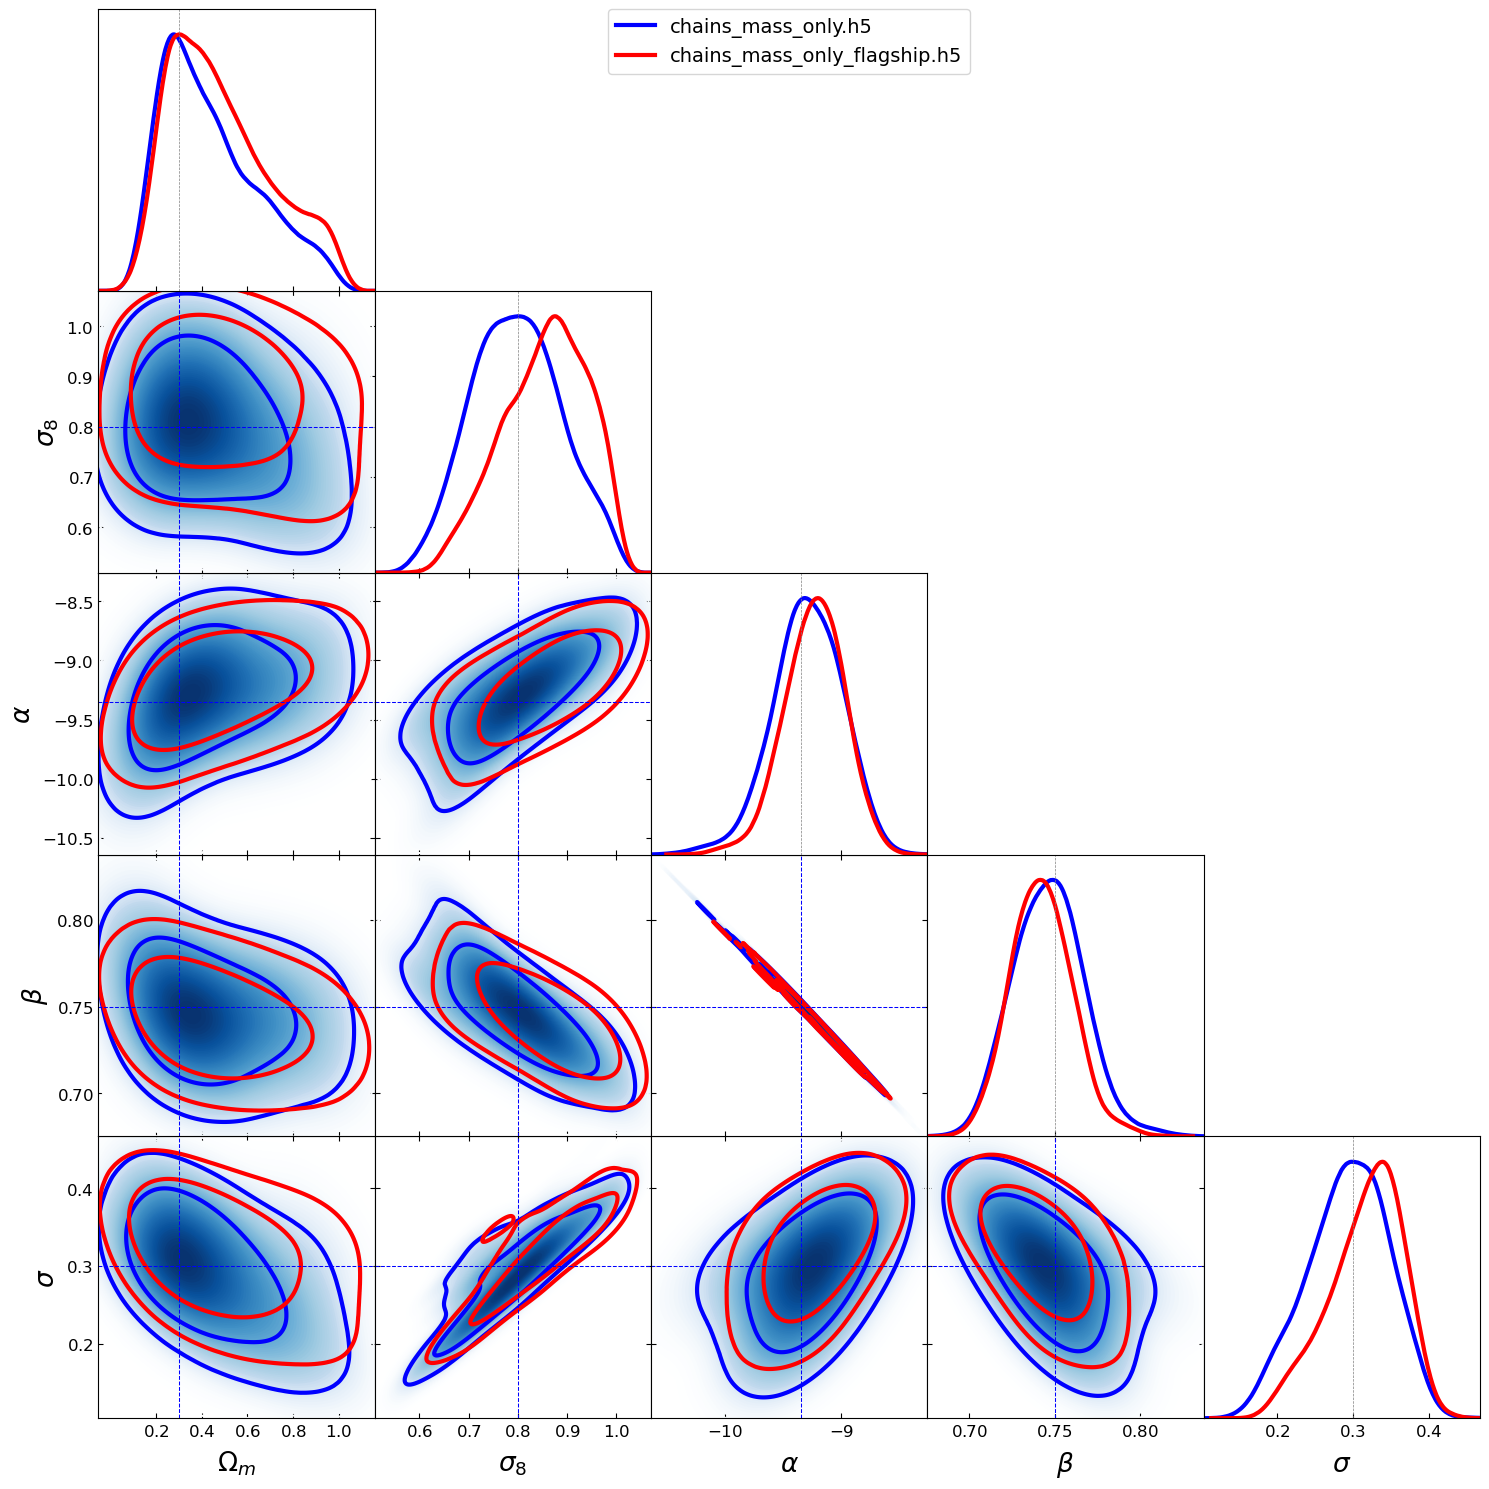

In [8]:
g = plots.get_subplot_plotter(subplot_size=3)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
#range_ = {'1':[2.5,4], '2':[-2,2], '3':[1,4], '4':[0.1,1.2],'5':[-1.5,1.5], '6':[-0.5,0.5], }
g.triangle_plot(
                [MC_fiducial[1]]+[MC_flagship[1]], 
                filled=[False, False, False, False, False], 
                contour_colors = ['b', 'r', 'g', 'k', 'r', 'k' ], 
                contour_ls=['-','-','-', '-', '-'],
                contour_lws=[3,3,1,1,2],shaded=True,
                legend_fontsize = 10,
                params=['1','2','3', '4', '5',],
                markers=markers,
                fine_bins = 5,  
                marker_args = marker_args)

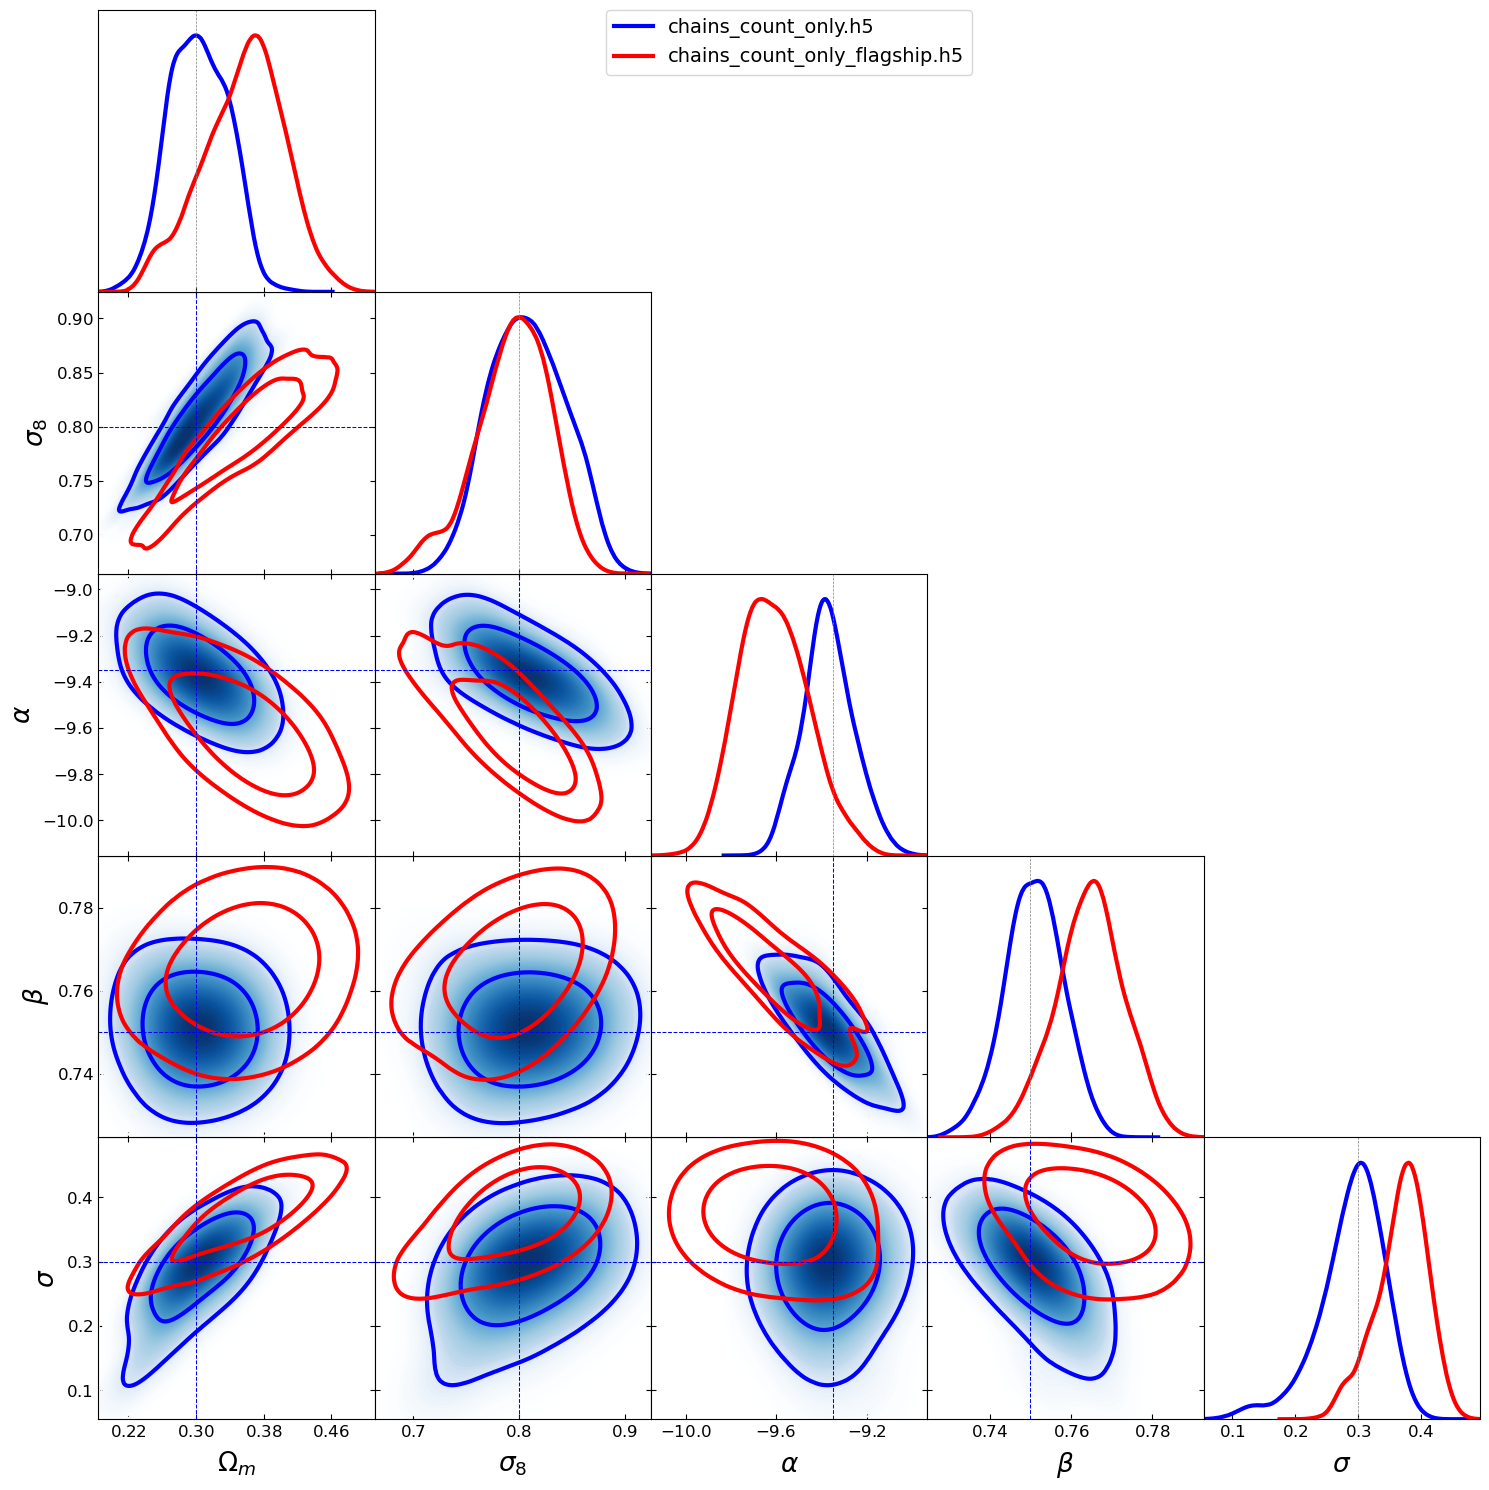

In [9]:
g = plots.get_subplot_plotter(subplot_size=3)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
#range_ = {'1':[2.5,4], '2':[-2,2], '3':[1,4], '4':[0.1,1.2],'5':[-1.5,1.5], '6':[-0.5,0.5], }
g.triangle_plot(
                [MC_fiducial[0]]+[MC_flagship[0]], 
                filled=[False, False, False, False, False], 
                contour_colors = ['b', 'r', 'g', 'k', 'r', 'k' ], 
                contour_ls=['-','-','-', '-', '-'],
                contour_lws=[3,3,1,1,2],shaded=True,
                legend_fontsize = 10,
                params=['1','2','3', '4', '5',],
                markers=markers,
                fine_bins = 5,  
                marker_args = marker_args)